# **Topic Modeling and Search with Top2Vec :** 
# **Wings of Time**

# **1. Import and Setup**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import sys
sys.path.append('/content/gdrive/My Drive/nlp')

## **a) To install Top2Vec library and pre-trained BERT sentence transformer options:**

In [ ]:
# !pip install top2vec[sentence_transformers]
!pip install pynndescent 

from top2vec import Top2Vec 


## **b) Import Libraries**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Import Dataset**

In [ ]:
df = pd.read_excel("/content/gdrive/MyDrive/data/clean/formatted_reviews.xlsx")
df.sample(4)

,date,source,attraction,reviews,rating
1492,2020.0,google_reviews,sea_aquarium,tempatnya sangat luas dan ikannya juga banyak ...,10.0
3428,2020.0,traveloka,sea_aquarium,sangat menyenangkan bersama keluarga,10.0
4280,2019.0,klook,wings_of_time,suasana pantai menambah kekaguman atraksi wing...,10.0
2379,2019.0,traveloka,uss,bagus dan menyenangkan serta banyak wahana yan...,8.0


In [ ]:
df['date'] = df['date'].astype(int)

In [ ]:
wot_df = df[df['attraction'] == 'wings_of_time']
wot_df = wot_df.sort_values(by=['date','rating'],ascending=[False,False])
# resetting index
wot_df = wot_df.reset_index(drop=True)
wot_df.tail(4)

,date,source,attraction,reviews,rating
339,2017,google_reviews,wings_of_time,ingin kesini lagi,8.0
340,2017,tripadvisor,wings_of_time,keren pertunjukkan yang wajib ditonton pertunj...,8.0
341,2017,tripadvisor,wings_of_time,air mancur menari melihat pertunjukan air di w...,8.0
342,2017,tripadvisor,wings_of_time,pengalaman nonton wings of time karena saya da...,8.0


In [ ]:
wot_docs = wot_df.loc[:, "reviews"].astype(str).values.tolist()
wot_docs[:7]

['penampilan laser yang sangat hebat untuk yang mau menonton di jam padat saran datang lebih awal agar bisa cari tempat duduk tepat di tengah sehingga pertunjukan lasernya terlihat jelas',
 'sangat bagus pemandangan laut dan pertunjukan laut pada malam hari',
 'salah spot indah untuk nonton di singapore',
 'keren sih anak2 suka pasti nya meski mungkin mereka ga paham jalan cerita kalau bisa pilih tempat duduk di tengah baris kedua or ketiga',
 'sangat bagusklo ke singapore tidak ke wings of time rugi karena waktu yang dibutuhkan hanya 20 menit dan hasilnya luar biasa',
 'kagum pertama kali nonton mauuu lah kalau nonton lagi',
 'pertunjukan yang membuat mata saya tidak bisa berkedip karena mampu membawa saya dan temanteman kedalam alur cerita dan pertunjukan yang ditampilkan pun sangat amat keren dan epic sekali']

# **3. Create and Train N-Gram model (Bi-Gram and Tri-Gram)**
* Top2Vec uses Gensim **simple_preprocess** to do tokenization. 
* To create Trigrams and Bigrams, pass a customized tokenizer into Top2Vec tokenizer parameter. 
* Use Gensim to train this N-gram model. Documents passed to the Phrases function to inspect for N-grams text corpus.

In [ ]:
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import strip_tags

# Build the bigram and trigram models 
sentence_stream = [doc.split(" ") for doc in wot_docs]
bigram = Phrases(sentence_stream, min_count=5, threshold=5, delimiter=b' ')
trigram = Phrases(bigram[sentence_stream], threshold=5, delimiter=b' ')

bigram_phraser = Phraser(bigram)
trigram_phraser = Phraser(trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
# Create Bi-Grams
def bi_gram(doc):
    sentence_stream = simple_preprocess(strip_tags(str(doc)), deacc=True)
    return bigram_phraser[sentence_stream] 


# Create Bi-Grams and Tri-Grams
def tri_gram(doc):
    sentence_stream = simple_preprocess(strip_tags(str(doc)), deacc=True)
    gen_bigram = bigram_phraser[sentence_stream]
    gen_trigram = trigram_phraser[bigram_phraser[sentence_stream]]
    return gen_trigram

# **4. Train Top2Vec Model**

### **Parameters**:
* **Documents**: Input corpus, should be a list of strings.
* **Min_count**: (Optional, default 50) Ignores all words with total frequency lower than this. For smaller corpora a smaller min_count will be necessary.
* **Embedding_model** (string or callable) – The valid string options are: doc2vec , universal-sentence-encoder , universal-sentence-encoder-multilingual,distiluse-base-multilingual-cased , all-MiniLM-L6-v2 , paraphrase-multilingual-MiniLM-L12-v2 
* **tokenizer** (callable (Optional, default None)) – Override the default tokenization method. If None then gensim.utils.simple_preprocess will be used. ***Tokenizer must take a document and return a list of tokens***.

In [ ]:
# FORM UNI-GRAMS, BI-GRAMS WITH BI-GRAM MODEL 

topicMODEL_bi = Top2Vec(documents= wot_docs, min_count=5, embedding_model = 'distiluse-base-multilingual-cased', tokenizer= bi_gram)  

2022-06-26 04:28:41,405 - top2vec - INFO - Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-06-26 04:28:41,463 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model


Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/114 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.37k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/607 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/341 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/539M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/528 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

2022-06-26 04:29:40,048 - top2vec - INFO - Creating joint document/word embedding
2022-06-26 04:30:04,225 - top2vec - INFO - Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2022-06-26 04:30:16,519 - top2vec - INFO - Finding dense areas of documents
2022-06-26 04:30:16,539 - top2vec - INFO - Finding topics


In [ ]:
# FORM UNI-GRAMS, BI-GRAMS, TRI-GRAMS WITH TRI-GRAM MODEL 
 
topicMODEL_tri = Top2Vec(documents= wot_docs, min_count=5, embedding_model = 'distiluse-base-multilingual-cased', tokenizer = tri_gram)  

2022-06-26 04:33:04,484 - top2vec - INFO - Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-06-26 04:33:04,568 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
2022-06-26 04:33:11,053 - top2vec - INFO - Creating joint document/word embedding
2022-06-26 04:33:32,712 - top2vec - INFO - Creating lower dimension embedding of documents
2022-06-26 04:33:36,718 - top2vec - INFO - Finding dense areas of documents
2022-06-26 04:33:36,735 - top2vec - INFO - Finding topics


In [ ]:
# SAVE MODELS FOR FUTURE USE

topicMODEL_bi.save("/content/gdrive/MyDrive/data/models/bigram_wot_june26")

topicMODEL_tri.save("/content/gdrive/MyDrive/data/models/trigram_wot_june26")

In [ ]:
# LOAD MODEL FROM SAVED MODELS

topicMODEL_bi = Top2Vec.load("/content/gdrive/MyDrive/data/models/bigram_wot_june26")

topicMODEL_tri = Top2Vec.load("/content/gdrive/MyDrive/data/models/trigram_wot_june26")

# **5. Perform Topic Reduction** 

* Reduce the number of topics discovered by Top2Vec.
* The most representative topics of the corpus will be found, by iteratively merging each smallest topic to the most similar topic until num_topics is reached. 
* Get the hierarchy of reduced topics. The mapping of each original topic to the reduced topics is returned.

In [ ]:
# BI-GRAM MODEL TOPIC REDUCTION
topicMODEL_bi.hierarchical_topic_reduction(num_topics=10) 

topicMODEL_bi.get_topic_hierarchy()

In [ ]:
# TRI-GRAM MODEL TOPIC REDUCTION 
topicMODEL_tri.hierarchical_topic_reduction(num_topics=10) 

topicMODEL_tri.get_topic_hierarchy()

# **6. Explore Discovered Topics**

## **6a) Get Number of Topics**
This will return the number of topics that Top2Vec has found in the data.

In [ ]:
# Show the Total Number of Topics 

print(f"Total Number of Topics generated (Topic Reduction Applied): \n")
print(f"Bi-gram Model : {topicMODEL_bi.get_num_topics(reduced=False)}")
print(f"Tri-gram Model : {topicMODEL_tri.get_num_topics(reduced=False)}")

Total Number of Topics generated (Topic Reduction Applied): 

Bi-gram Model : 4
Tri-gram Model : 3


## **6b) Get Topic Sizes**
This will return the number of documents most similar to each topic. Topics are in decreasing order of size.

Returns:
* topic_sizes: The number of documents most similar to each topic.
* topic_nums: The unique index of every topic will be returned.

### **6b.1. Bi-Gram and Tri-Gram Model Topic Sizes**

In [ ]:
print("BI-GRAM MODEL where N = 1 and 2")
print("================================\n")
topic_sizes_bi, topic_nums_bi = topicMODEL_bi.get_topic_sizes(reduced=False) 

print(f"Unique index numbers of every topic: {topic_nums_bi} ")
print()
print(f"Number of documents for each unique topic: {topic_sizes_bi} \n")

print("TRI-GRAM MODEL where N = 1, 2 and 3")
print("====================================\n")
topic_sizes_tri, topic_nums_tri = topicMODEL_tri.get_topic_sizes(reduced=False) 
print(f"Unique index numbers of every topic: {topic_nums_tri} ")
print()
print(f"Number of documents for each unique topic: {topic_sizes_tri} ") 

BI-GRAM MODEL where N = 1 and 2

Unique index numbers of every topic: [0 1 2 3] 

Number of documents for each unique topic: [124 101  90  28] 

TRI-GRAM MODEL where N = 1, 2 and 3

Unique index numbers of every topic: [0 1 2] 

Number of documents for each unique topic: [135 120  88] 


## **6c) Get Topics**
This will return the topics in decreasing size.

Returns:

* topic_words: For each topic the top 50 words are returned, in decreasing order of semantic similarity to topic.

* word_scores: For each topic the cosine similarity scores (in decreasing order) of the top 50 words to the topic are returned.

* topic_nums: The unique index of every topic will be returned.

### **c.1.  BI-GRAM Model Topics**

In [ ]:
print(f"TOPICS FOR BI-GRAM MODEL: \n")
topic_words_bi, word_scores_bi, topic_nums_bi = topicMODEL_bi.get_topics(topicMODEL_bi.get_num_topics(reduced=False))

for count,(words_bi, scores_bi, num_bi) in enumerate(zip(topic_words_bi, word_scores_bi, topic_nums_bi)):
    print(f"{count+1}. Topic {num_bi+1}") 
    print(f"Topic Words : \n{words_bi} \n")
    # print(f"Cosine Similarity :\n{scores_bi}\n")

TOPICS FOR BI-GRAM MODEL: 

1. Topic 1
Topic Words : 
['spektakuler' 'menakjubkan' 'luar biasa' 'amazing' 'menyenangkan'
 'sangat bagus' 'sangat menarik' 'indah' 'pertunjukan yang'
 'pertunjukannya' 'menarik' 'pertunjukan' 'menikmati' 'keren' 'bagus'
 'keren banget' 'hiburan' 'show' 'pertunjukkan' 'senang' 'best' 'terbaik'
 'berkunjung' 'cocok untuk' 'atraksi' 'acara' 'menonton' 'penukaran'
 'tontonan' 'very' 'penukaran tiket' 'sangat' 'puas' 'song of' 'perpaduan'
 'suka' 'di klook' 'pertunjukkannya' 'banget' 'wahana' 'murah'
 'pengalaman' 'deh' 'memukau' 'pada' 'beli' 'nya' 'cerita' 'melihat'
 'dengan'] 

2. Topic 2
Topic Words : 
['sinar laser' 'lasernya' 'laser' 'cahaya' 'lampu' 'sangat menarik'
 'amazing' 'pertunjukan yang' 'menakjubkan' 'luar biasa' 'pertunjukannya'
 'show' 'pertunjukan' 'spektakuler' 'sangat bagus' 'kembang api'
 'teknologi' 'hiburan' 'indah' 'menyenangkan' 'the sea' 'sea' 'air mancur'
 'sound' 'menonton' 'menarik' 'api' 'pertunjukkan' 'sentosa island'
 'beach' '

### **c.2. Tri-Gram Model Topics**

In [ ]:
print(f"TOPICS FOR TRI-GRAM MODEL : \n")
topic_words_tri, word_scores_tri, topic_nums_tri = topicMODEL_tri.get_topics(topicMODEL_tri.get_num_topics(reduced=False))

for count, (words_tri, scores_tri, num_tri) in enumerate(zip(topic_words_tri, word_scores_tri, topic_nums_tri)):
    print(f"{count+1}. Topic {num_tri+1}") 
    print(f"Topic Words : \n{words_tri}\n")
    # print(f"Cosine Similarity :\n{scores_tri}\n")

TOPICS FOR TRI-GRAM MODEL : 

1. Topic 1
Topic Words : 
['spektakuler' 'menakjubkan' 'luar biasa' 'amazing' 'menyenangkan'
 'sangat bagus' 'sangat menarik' 'pertunjukan yang' 'pertunjukannya'
 'indah' 'melihat pertunjukan' 'pertunjukan' 'menarik' 'menikmati' 'keren'
 'keren banget' 'bagus' 'hiburan' 'show' 'pertunjukkan' 'senang' 'best'
 'terbaik' 'berkunjung' 'menonton' 'atraksi' 'acara' 'cocok untuk' 'very'
 'penukaran' 'tontonan' 'penukaran tiket' 'sangat' 'puas' 'suka'
 'perpaduan' 'terima kasih traveloka' 'wahana' 'di klook'
 'pertunjukkannya' 'banget' 'pertunjukan laser' 'deh' 'murah' 'memukau'
 'pengalaman' 'pada' 'sayang' 'nya' 'wajib']

2. Topic 2
Topic Words : 
['pertunjukan laser' 'sinar laser' 'laser' 'lasernya' 'singapore'
 'song of the sea' 'cahaya' 'melihat pertunjukan' 'lampu' 'sangat menarik'
 'amazing' 'singapura' 'menakjubkan' 'luar biasa' 'pertunjukan yang'
 'spektakuler' 'show' 'pertunjukannya' 'pertunjukan' 'of the sea'
 'sangat bagus' 'indah' 'hiburan' 'menyenang

## **6d) Search Documents by Topic**
We are going to search by topic; for example Topic 3. 

Returns:

* documents:  The documents in a list, the most similar are first.
* doc_scores:  Semantic similarity of document to topic. The cosine similarity of the document and topic vector.
* doc_ids:  Unique ids of documents. If ids were not given, the index of document in the original corpus.

For each of the returned documents we are going to print its content, score and document number.

### **d.1. Search Documents By Topic Number Using Bi-Gram Model**

In [ ]:
# SEARCH DOCUMENTS BY TOPIC NUMBER USING BI-GRAM MODEL 
topic_num_bi = 0
documents_bi, document_scores_bi, document_ids_bi = topicMODEL_bi.search_documents_by_topic(topic_num= topic_num_bi , num_docs= 5, reduced=False) 

print(f"TOPIC NUMBER: {topic_num_bi}\n")
for count, (doc_bi, docscore_bi, doc_id_bi) in enumerate(zip(documents_bi, document_scores_bi, document_ids_bi)):
    print(f"{count}. Document: {doc_id_bi},  Score: {docscore_bi}")
    print("-----------")
    print(doc_bi)
    print("-----------\n")

TOPIC NUMBER: 0

0. Document: 105,  Score: 0.5958958268165588
-----------
amazing what a memorable show to be remembered
-----------

1. Document: 96,  Score: 0.5730393528938293
-----------
bagus wah mengesankan
-----------

2. Document: 112,  Score: 0.569579005241394
-----------
very interesting with this performance
-----------

3. Document: 322,  Score: 0.5592724084854126
-----------
pertunjukan yang sangat menakjubkan
-----------

4. Document: 97,  Score: 0.5490305423736572
-----------
pertunjukan yang spektakuler
-----------



### **d.2. Search Documents By Topic Number Using Tri-Gram Model**

In [ ]:
# SEARCH DOCUMENTS BY TOPIC NUMBER USING TRI-GRAM MODEL 
topic_num_tri = 1
documents_tri, document_scores_tri, document_ids_tri = topicMODEL_tri.search_documents_by_topic(topic_num= topic_num_tri, num_docs= 5, reduced=False) 
print(f"TOPIC NUMBER: {topic_num_bi}\n")
for count, (doc_tri, docscore_tri, doc_id_tri) in enumerate(zip(documents_tri, document_scores_tri, document_ids_tri)):
    print(f"{count}. Document: {doc_id_tri},  Score: {docscore_tri}")
    print("-----------")
    print(doc_tri)
    print("-----------\n")

TOPIC NUMBER: 0

0. Document: 341,  Score: 0.6865735054016113
-----------
air mancur menari melihat pertunjukan air di wings of time sentosa island singapura memang sangat bagus sekali kita bisa melihat atraksi air dan laser yang sangat fantastis
-----------

1. Document: 168,  Score: 0.5781803727149963
-----------
never bored with this water laser show
-----------

2. Document: 47,  Score: 0.5738463401794434
-----------
pengalaman yang luar biasa menikmati wings of time show bersama teman teman sangat mengesankan bisa bersama menyaksikan perpaduan antara air mancur kembang api dan sinar laser semua bergembira dan saya merasa dari anak anak sampai orang tua bisa menerima dan senang melihat pertunjukan tersebut silakan mengajak bersama keluarga teman dan rekanan untuk wisata bersama keluar negeri
-----------

3. Document: 22,  Score: 0.5626066327095032
-----------
wings of time sentosa island saya tahu sudah lama tapi dulu nama song of the sea secara cerita saya lebih suka yang dulu beg

# **7) Constructing Dataframe to Collate Information of Key Topics**

## **7a) BI-GRAM MODEL**

In [ ]:
# CONSTRUCT DATAFRAME OF BI-GRAM MODEL WITH KEY INFORMATION FOR EXPORT
# initialize data of lists.
bigram_table = {
              'topic number': [num_bi for num_bi in topic_nums_bi],
              'topic words': [words_bi for words_bi in topic_words_bi],
              'cosine similarity metrics': [scores_bi for scores_bi in word_scores_bi],
              'similar documents': [size_bi for size_bi in topic_sizes_bi],
               }
 
# Create DataFrame
bigram_df = pd.DataFrame(bigram_table)
bigram_df['topic number'] = bigram_df['topic number'].apply(lambda x: x + 1)

# print(bigram_df.head(2))
bigram_df.tail()

,topic number,topic words,cosine similarity metrics,similar documents
0,1,"[spektakuler, menakjubkan, luar biasa, amazing...","[0.63265204, 0.6124835, 0.61028427, 0.6029364,...",124
1,2,"[sinar laser, lasernya, laser, cahaya, lampu, ...","[0.48231977, 0.45521313, 0.44734153, 0.2472249...",101
2,3,"[tiketnya, penukaran tiket, beli tiket, tiket,...","[0.38382202, 0.36330044, 0.25680697, 0.2281474...",90
3,4,"[singapore, singapura, berkunjung, sentosa isl...","[0.5917305, 0.5508361, 0.15389697, 0.14399403,...",28


### **7a.1. Build Functions to Expand Column Features in Bi-Gram Dataframe**

In [ ]:
def get_document_index(topic_num_bi, num_doc):
    documents_bi, document_scores_bi, document_ids_bi = topicMODEL_bi.search_documents_by_topic(topic_num= topic_num_bi , num_docs= num_doc, reduced=False)
    document_index = [doc_id_bi for doc_id_bi in document_ids_bi]
    return document_index 

def get_document_scores(topic_num_bi, num_doc):
    documents_bi, document_scores_bi, document_ids_bi = topicMODEL_bi.search_documents_by_topic(topic_num= topic_num_bi , num_docs= num_doc, reduced=False)
    document_scores = [docscore_bi for docscore_bi in document_scores_bi]
    return document_scores


def get_documents(topic_num_bi, num_doc):
    documents_bi, document_scores_bi, document_ids_bi = topicMODEL_bi.search_documents_by_topic(topic_num= topic_num_bi , num_docs= num_doc, reduced=False)
    actual_document = [doc_bi for doc_bi in documents_bi]
    return actual_document


In [ ]:
bigram_df['document index'] = bigram_df['topic number'].apply(lambda x: get_document_index(x-1, bigram_df['similar documents'].values[x-1]))

bigram_df['document scores'] = bigram_df['topic number'].apply(lambda x: get_document_scores(x-1, bigram_df['similar documents'].values[x-1]))

bigram_df['actual reviews'] = bigram_df['topic number'].apply(lambda x: get_documents(x-1, bigram_df['similar documents'].values[x-1]))

bigram_df

,topic number,topic words,cosine similarity metrics,similar documents,document index,document scores,actual reviews
0,1,"[spektakuler, menakjubkan, luar biasa, amazing...","[0.63265204, 0.6124835, 0.61028427, 0.6029364,...",124,"[105, 96, 112, 322, 97, 275, 334, 206, 228, 98...","[0.5958958, 0.57303935, 0.569579, 0.5592724, 0...",[amazing what a memorable show to be remembere...
1,2,"[sinar laser, lasernya, laser, cahaya, lampu, ...","[0.48231977, 0.45521313, 0.44734153, 0.2472249...",101,"[341, 47, 168, 61, 208, 65, 237, 143, 7, 60, 1...","[0.66856766, 0.60637575, 0.6001031, 0.59885836...",[air mancur menari melihat pertunjukan air di ...
2,3,"[tiketnya, penukaran tiket, beli tiket, tiket,...","[0.38382202, 0.36330044, 0.25680697, 0.2281474...",90,"[260, 251, 134, 124, 32, 128, 24, 154, 307, 24...","[0.54761887, 0.5463863, 0.54638135, 0.54294515...",[beli via traveloka lebih mudah menghindari an...
3,4,"[singapore, singapura, berkunjung, sentosa isl...","[0.5917305, 0.5508361, 0.15389697, 0.14399403,...",28,"[2, 106, 203, 111, 17, 231, 287, 162, 188, 51,...","[0.6238945, 0.59710526, 0.58805406, 0.58614564...","[salah spot indah untuk nonton di singapore, t..."


In [ ]:
# for count, (index, review) in enumerate(zip(bigram_df['document index'][28], bigram_df['actual reviews'][28])):
#   print(f"{count}: {index} = {review})")

bigram_df.to_excel(f'/content/gdrive/MyDrive/data/export/bigram_df_wot.xlsx', index=False)

## **7b) TRI-GRAM MODEL**

In [ ]:
# CONSTRUCT DATAFRAME CONTAINING KEY INFORMATION FOR EXPORT
# initialize data of lists.
trigram_table = {
                'topic number': [num_tri for num_tri in topic_nums_tri],
                'topic words': [words_tri for words_tri in topic_words_tri],
                'cosine similarity metrics': [scores_tri for scores_tri in word_scores_tri],
                'similar documents': [size_tri for size_tri in topic_sizes_tri],
                 }

# Create DataFrame
trigram_df = pd.DataFrame(trigram_table)

trigram_df['topic number'] = trigram_df['topic number'].apply(lambda x: x + 1)
trigram_df.tail()

,topic number,topic words,cosine similarity metrics,similar documents
0,1,"[spektakuler, menakjubkan, luar biasa, amazing...","[0.59874165, 0.5787039, 0.5750456, 0.5725828, ...",135
1,2,"[pertunjukan laser, sinar laser, laser, lasern...","[0.46870834, 0.41559833, 0.38709027, 0.3832347...",120
2,3,"[tiketnya, penukaran tiket, beli tiket, tiket,...","[0.37466335, 0.35649225, 0.2518131, 0.22332558...",88


### **7b.1. Build Functions to Expand Column Features in Tri-Gram Dataframe**

In [ ]:
def get_document_index_tri(topic_num_tri, num_docs):
    documents_tri, document_scores_tri, document_ids_tri = topicMODEL_tri.search_documents_by_topic(topic_num= topic_num_tri , num_docs= num_docs, reduced=False)
    document_index = [doc_id_tri for doc_id_tri in document_ids_tri]
    return document_index 

def get_document_scores_tri(topic_num_tri, num_docs):
    documents_tri, document_scores_tri, document_ids_tri = topicMODEL_tri.search_documents_by_topic(topic_num= topic_num_tri , num_docs= num_docs, reduced=False)
    document_scores = [docscore_tri for docscore_tri in document_scores_tri]
    return document_scores


def get_documents_tri(topic_num_tri, num_docs):
    documents_tri, document_scores_tri, document_ids_tri = topicMODEL_tri.search_documents_by_topic(topic_num= topic_num_tri , num_docs= num_docs, reduced=False)
    actual_document = [doc_tri for doc_tri in documents_tri]
    return actual_document


In [ ]:
trigram_df['document index'] = trigram_df['topic number'].apply(lambda x: get_document_index_tri(x-1, trigram_df['similar documents'].values[x-1]))

trigram_df['document scores'] = trigram_df['topic number'].apply(lambda x: get_document_scores_tri(x-1, trigram_df['similar documents'].values[x-1]))

trigram_df['actual reviews'] = trigram_df['topic number'].apply(lambda x: get_documents_tri(x-1, trigram_df['similar documents'].values[x-1]))

trigram_df

,topic number,topic words,cosine similarity metrics,similar documents,document index,document scores,actual reviews
0,1,"[spektakuler, menakjubkan, luar biasa, amazing...","[0.59874165, 0.5787039, 0.5750456, 0.5725828, ...",135,"[105, 112, 96, 322, 206, 275, 334, 97, 25, 228...","[0.59962344, 0.56962585, 0.5533652, 0.55182874...",[amazing what a memorable show to be remembere...
1,2,"[pertunjukan laser, sinar laser, laser, lasern...","[0.46870834, 0.41559833, 0.38709027, 0.3832347...",120,"[341, 168, 47, 22, 7, 237, 61, 208, 148, 60, 3...","[0.6865735, 0.5781804, 0.57384634, 0.56260663,...",[air mancur menari melihat pertunjukan air di ...
2,3,"[tiketnya, penukaran tiket, beli tiket, tiket,...","[0.37466335, 0.35649225, 0.2518131, 0.22332558...",88,"[260, 124, 134, 251, 32, 128, 176, 154, 24, 30...","[0.5479286, 0.54763234, 0.5412958, 0.5405931, ...",[beli via traveloka lebih mudah menghindari an...


In [ ]:
# for count, (index, review) in enumerate(zip(trigram_df['document index'][0], trigram_df['actual reviews'][0])):
#   print(f"{count}: {index} = {review})")

trigram_df.to_excel(f'/content/gdrive/MyDrive/data/export/trigram_df_wot.xlsx', index=False)

# **8. Defining Topic Labels on Reviews** 
## **8a) User-Define Topic Labels** 
### **8a.1:  BI-GRAM Model** 

In [ ]:
# Create the dictionary containing the data of the new column
bigram_col_dict = { 'Topic 1': 'visitors sentiments',               'Topic 2': 'features visitors like',
                    'Topic 3': 'ticketing',                         'Topic 4': 'vacation choice',
                        
                  }
                   
# Assign the values of the dictionary as the values of the new column
bigram_df['topic label'] = bigram_col_dict.values()
bigram_df

,topic number,topic words,cosine similarity metrics,similar documents,document index,document scores,actual reviews,topic label
0,1,"[spektakuler, menakjubkan, luar biasa, amazing...","[0.63265204, 0.6124835, 0.61028427, 0.6029364,...",124,"[105, 96, 112, 322, 97, 275, 334, 206, 228, 98...","[0.5958958, 0.57303935, 0.569579, 0.5592724, 0...",[amazing what a memorable show to be remembere...,visitors sentiments
1,2,"[sinar laser, lasernya, laser, cahaya, lampu, ...","[0.48231977, 0.45521313, 0.44734153, 0.2472249...",101,"[341, 47, 168, 61, 208, 65, 237, 143, 7, 60, 1...","[0.66856766, 0.60637575, 0.6001031, 0.59885836...",[air mancur menari melihat pertunjukan air di ...,features visitors like
2,3,"[tiketnya, penukaran tiket, beli tiket, tiket,...","[0.38382202, 0.36330044, 0.25680697, 0.2281474...",90,"[260, 251, 134, 124, 32, 128, 24, 154, 307, 24...","[0.54761887, 0.5463863, 0.54638135, 0.54294515...",[beli via traveloka lebih mudah menghindari an...,ticketing
3,4,"[singapore, singapura, berkunjung, sentosa isl...","[0.5917305, 0.5508361, 0.15389697, 0.14399403,...",28,"[2, 106, 203, 111, 17, 231, 287, 162, 188, 51,...","[0.6238945, 0.59710526, 0.58805406, 0.58614564...","[salah spot indah untuk nonton di singapore, t...",vacation choice


In [ ]:
# CREATE COPY OF ORIGINAL DATAFRAME
wot_DF_BI = wot_df.copy()
wot_DF_BI.tail(3)

,date,source,attraction,reviews,rating
340,2017,tripadvisor,wings_of_time,keren pertunjukkan yang wajib ditonton pertunj...,8.0
341,2017,tripadvisor,wings_of_time,air mancur menari melihat pertunjukan air di w...,8.0
342,2017,tripadvisor,wings_of_time,pengalaman nonton wings of time karena saya da...,8.0


In [ ]:
print([i for i in range(topicMODEL_bi.get_num_topics(reduced=False))])

[0, 1, 2, 3]


In [ ]:
# FUNCTION TO CONNECT TOPIC LABELS TO INDEX LIST
def get_indexLIST(i):
      topic = [doc_ind for doc_ind in bigram_df['document index'][i]]
      return topic

In [ ]:
for i in range(topicMODEL_bi.get_num_topics(reduced=False)):
    wot_DF_BI.loc[get_indexLIST(i), 'topic label'] = bigram_df['topic label'][i]
    

In [ ]:
# FUNCTION TO CONNECT DOCUMENT COSINE SCORE TO INDEX LIST
def get_scores(i):
    score = [doc_score for doc_score in bigram_df['document scores'][i]]
    return score

In [ ]:
for i in range(topicMODEL_bi.get_num_topics(reduced=False)):
    wot_DF_BI.loc[get_indexLIST(i), 'cosine score review/topic'] = get_scores(i) 

In [ ]:
wot_DF_BI.reset_index(drop=True)
wot_DF_BI

,date,source,attraction,reviews,rating,topic label,cosine score review/topic
0,2021,google_reviews,wings_of_time,penampilan laser yang sangat hebat untuk yang ...,10.0,features visitors like,0.464818
1,2021,google_reviews,wings_of_time,sangat bagus pemandangan laut dan pertunjukan ...,10.0,features visitors like,0.308913
2,2020,google_reviews,wings_of_time,salah spot indah untuk nonton di singapore,10.0,vacation choice,0.623895
3,2020,google_reviews,wings_of_time,keren sih anak2 suka pasti nya meski mungkin m...,10.0,features visitors like,0.177645
4,2020,google_reviews,wings_of_time,sangat bagusklo ke singapore tidak ke wings of...,10.0,vacation choice,0.381213
...,...,...,...,...,...,...,...
338,2017,google_reviews,wings_of_time,mantappertunjukannya sangat kerenmenghibur,8.0,visitors sentiments,0.378941
339,2017,google_reviews,wings_of_time,ingin kesini lagi,8.0,visitors sentiments,0.094718
340,2017,tripadvisor,wings_of_time,keren pertunjukkan yang wajib ditonton pertunj...,8.0,features visitors like,0.538387
341,2017,tripadvisor,wings_of_time,air mancur menari melihat pertunjukan air di w...,8.0,features visitors like,0.668568


In [ ]:
# TO VERIFY TOPIC LABELING IS CORRECT: 
# STEP 1 - GENERATE RANDOM SAMPLE TABLE FROM NEW DATAFRAME 
bigram_df.sample(4)

,topic number,topic words,cosine similarity metrics,similar documents,document index,document scores,actual reviews,topic label
1,2,"[sinar laser, lasernya, laser, cahaya, lampu, ...","[0.48231977, 0.45521313, 0.44734153, 0.2472249...",101,"[341, 47, 168, 61, 208, 65, 237, 143, 7, 60, 1...","[0.66856766, 0.60637575, 0.6001031, 0.59885836...",[air mancur menari melihat pertunjukan air di ...,features visitors like
2,3,"[tiketnya, penukaran tiket, beli tiket, tiket,...","[0.38382202, 0.36330044, 0.25680697, 0.2281474...",90,"[260, 251, 134, 124, 32, 128, 24, 154, 307, 24...","[0.54761887, 0.5463863, 0.54638135, 0.54294515...",[beli via traveloka lebih mudah menghindari an...,ticketing
3,4,"[singapore, singapura, berkunjung, sentosa isl...","[0.5917305, 0.5508361, 0.15389697, 0.14399403,...",28,"[2, 106, 203, 111, 17, 231, 287, 162, 188, 51,...","[0.6238945, 0.59710526, 0.58805406, 0.58614564...","[salah spot indah untuk nonton di singapore, t...",vacation choice
0,1,"[spektakuler, menakjubkan, luar biasa, amazing...","[0.63265204, 0.6124835, 0.61028427, 0.6029364,...",124,"[105, 96, 112, 322, 97, 275, 334, 206, 228, 98...","[0.5958958, 0.57303935, 0.569579, 0.5592724, 0...",[amazing what a memorable show to be remembere...,visitors sentiments


In [ ]:
# TO VERIFY TOPIC LABELING IS CORRECT: 
# STEP 2 - SELECT INDEXES FROM ORIGINAL DATAFRAME TO COMPARE

wot_DF_BI.iloc[[341, 260, 2, 105]] 

,date,source,attraction,reviews,rating,topic label,cosine score review/topic
341,2017,tripadvisor,wings_of_time,air mancur menari melihat pertunjukan air di w...,8.0,features visitors like,0.668568
260,2019,traveloka,wings_of_time,beli via traveloka lebih mudah menghindari ant...,8.0,ticketing,0.547619
2,2020,google_reviews,wings_of_time,salah spot indah untuk nonton di singapore,10.0,vacation choice,0.623895
105,2019,traveloka,wings_of_time,amazing what a memorable show to be remembered,10.0,visitors sentiments,0.595896


In [ ]:
wot_DF_BI.to_excel(f'/content/gdrive/MyDrive/data/export/wot_DF_BI.xlsx', index=False)

### **8a.2  TRI-GRAM Model** 

In [ ]:
# Create the dictionary containing the data of the new column
trigram_col_dict = { 'Topic 1': 'visitors sentiments',               'Topic 2': 'features visitors like',
                    'Topic 3': 'ticketing',                      
                        
                  }
   
# Assign the values of the dictionary as the values of the new column
trigram_df['topic label'] = trigram_col_dict.values()
trigram_df.tail(3)

,topic number,topic words,cosine similarity metrics,similar documents,document index,document scores,actual reviews,topic label
0,1,"[spektakuler, menakjubkan, luar biasa, amazing...","[0.59874165, 0.5787039, 0.5750456, 0.5725828, ...",135,"[105, 112, 96, 322, 206, 275, 334, 97, 25, 228...","[0.59962344, 0.56962585, 0.5533652, 0.55182874...",[amazing what a memorable show to be remembere...,visitors sentiments
1,2,"[pertunjukan laser, sinar laser, laser, lasern...","[0.46870834, 0.41559833, 0.38709027, 0.3832347...",120,"[341, 168, 47, 22, 7, 237, 61, 208, 148, 60, 3...","[0.6865735, 0.5781804, 0.57384634, 0.56260663,...",[air mancur menari melihat pertunjukan air di ...,features visitors like
2,3,"[tiketnya, penukaran tiket, beli tiket, tiket,...","[0.37466335, 0.35649225, 0.2518131, 0.22332558...",88,"[260, 124, 134, 251, 32, 128, 176, 154, 24, 30...","[0.5479286, 0.54763234, 0.5412958, 0.5405931, ...",[beli via traveloka lebih mudah menghindari an...,ticketing


In [ ]:
# CREATE COPY OF ORIGINAL DATAFRAME
wot_DF_TRI = wot_df.copy()
wot_DF_TRI.tail(3)

,date,source,attraction,reviews,rating
340,2017,tripadvisor,wings_of_time,keren pertunjukkan yang wajib ditonton pertunj...,8.0
341,2017,tripadvisor,wings_of_time,air mancur menari melihat pertunjukan air di w...,8.0
342,2017,tripadvisor,wings_of_time,pengalaman nonton wings of time karena saya da...,8.0


In [ ]:
print([i for i in range(topicMODEL_tri.get_num_topics(reduced=False))])

[0, 1, 2]


In [ ]:
# FUNCTION TO CONNECT TOPIC LABELS TO INDEX LIST
def get_indexLIST(i):
      topic = [doc_ind for doc_ind in trigram_df['document index'][i]]
      return topic

In [ ]:
for i in range(topicMODEL_tri.get_num_topics(reduced=False)):
    wot_DF_TRI.loc[get_indexLIST(i), 'topic_label'] = trigram_df['topic label'][i]

In [ ]:
# FUNCTION TO CONNECT DOCUMENT COSINE SCORE TO INDEX LIST
def get_scores(i):
    score = [doc_score for doc_score in trigram_df['document scores'][i]]
    return score

In [ ]:
for i in range(topicMODEL_tri.get_num_topics(reduced=False)):
    wot_DF_TRI.loc[get_indexLIST(i), 'cosine score review/topic'] = get_scores(i) 

In [ ]:
wot_DF_TRI.reset_index(drop=True)
wot_DF_TRI

,date,source,attraction,reviews,rating,topic_label,cosine score review/topic
0,2021,google_reviews,wings_of_time,penampilan laser yang sangat hebat untuk yang ...,10.0,features visitors like,0.429124
1,2021,google_reviews,wings_of_time,sangat bagus pemandangan laut dan pertunjukan ...,10.0,features visitors like,0.340718
2,2020,google_reviews,wings_of_time,salah spot indah untuk nonton di singapore,10.0,features visitors like,0.298596
3,2020,google_reviews,wings_of_time,keren sih anak2 suka pasti nya meski mungkin m...,10.0,features visitors like,0.183183
4,2020,google_reviews,wings_of_time,sangat bagusklo ke singapore tidak ke wings of...,10.0,features visitors like,0.350560
...,...,...,...,...,...,...,...
338,2017,google_reviews,wings_of_time,mantappertunjukannya sangat kerenmenghibur,8.0,visitors sentiments,0.371938
339,2017,google_reviews,wings_of_time,ingin kesini lagi,8.0,visitors sentiments,0.126435
340,2017,tripadvisor,wings_of_time,keren pertunjukkan yang wajib ditonton pertunj...,8.0,features visitors like,0.507745
341,2017,tripadvisor,wings_of_time,air mancur menari melihat pertunjukan air di w...,8.0,features visitors like,0.686574


In [ ]:
wot_DF_TRI.isnull().values.any()

False

In [ ]:
# TO VERIFY TOPIC LABELING IS CORRECT: 
# STEP 1 - GENERATE RANDOM SAMPLE TABLE FROM NEW DATAFRAME 
trigram_df.sample(3)

,topic number,topic words,cosine similarity metrics,similar documents,document index,document scores,actual reviews,topic label
1,2,"[pertunjukan laser, sinar laser, laser, lasern...","[0.46870834, 0.41559833, 0.38709027, 0.3832347...",120,"[341, 168, 47, 22, 7, 237, 61, 208, 148, 60, 3...","[0.6865735, 0.5781804, 0.57384634, 0.56260663,...",[air mancur menari melihat pertunjukan air di ...,features visitors like
2,3,"[tiketnya, penukaran tiket, beli tiket, tiket,...","[0.37466335, 0.35649225, 0.2518131, 0.22332558...",88,"[260, 124, 134, 251, 32, 128, 176, 154, 24, 30...","[0.5479286, 0.54763234, 0.5412958, 0.5405931, ...",[beli via traveloka lebih mudah menghindari an...,ticketing
0,1,"[spektakuler, menakjubkan, luar biasa, amazing...","[0.59874165, 0.5787039, 0.5750456, 0.5725828, ...",135,"[105, 112, 96, 322, 206, 275, 334, 97, 25, 228...","[0.59962344, 0.56962585, 0.5533652, 0.55182874...",[amazing what a memorable show to be remembere...,visitors sentiments


In [ ]:
# TO VERIFY TOPIC LABELING IS CORRECT: 
# STEP 2 - SELECT INDEXES FROM ORIGINAL DATAFRAME TO COMPARE

wot_DF_TRI.iloc[[341, 260, 105]] 

,date,source,attraction,reviews,rating,topic_label,cosine score review/topic
341,2017,tripadvisor,wings_of_time,air mancur menari melihat pertunjukan air di w...,8.0,features visitors like,0.686574
260,2019,traveloka,wings_of_time,beli via traveloka lebih mudah menghindari ant...,8.0,ticketing,0.547929
105,2019,traveloka,wings_of_time,amazing what a memorable show to be remembered,10.0,visitors sentiments,0.599623


In [ ]:
wot_DF_TRI.to_excel(f'/content/gdrive/MyDrive/data/export/wot_DF_TRI.xlsx', index=False)

# **9.  Visualization**

In [9]:
uss_topred = pd.read_excel("/content/gdrive/MyDrive/data/export/wot_DF_BI.xlsx")
uss_topred.isnull().values.any()
uss_topred = uss_topred.loc[uss_topred['date'] != 2017]
uss_topred

,date,source,attraction,reviews,rating,topic label,cosine score review/topic
0,2021,google_reviews,wings_of_time,penampilan laser yang sangat hebat untuk yang ...,10,features that impressed,0.463392
1,2021,google_reviews,wings_of_time,sangat bagus pemandangan laut dan pertunjukan ...,10,features that impressed,0.321948
2,2020,google_reviews,wings_of_time,salah spot indah untuk nonton di singapore,10,vacation choice,0.611498
3,2020,google_reviews,wings_of_time,keren sih anak2 suka pasti nya meski mungkin m...,10,features that impressed,0.179076
4,2020,google_reviews,wings_of_time,sangat bagusklo ke singapore tidak ke wings of...,10,vacation choice,0.389955
...,...,...,...,...,...,...,...
325,2018,google_reviews,wings_of_time,wings of time salah satu tempat atraksi terbai...,8,features that impressed,0.467657
326,2018,klook,wings_of_time,saya sangat senang karena sangat2 bagus dan me...,8,features that impressed,0.240091
327,2018,google_reviews,wings_of_time,banyak yang suka sih tapi saya pribadi g terla...,6,features that impressed,0.449293
328,2018,google_reviews,wings_of_time,sinema laser sentosa sg,6,features that impressed,0.290341


In [12]:
sns.color_palette("gist_rainbow") 
sns.set_palette("gist_rainbow")
sns.set_theme(style="ticks", font_scale=1.6)

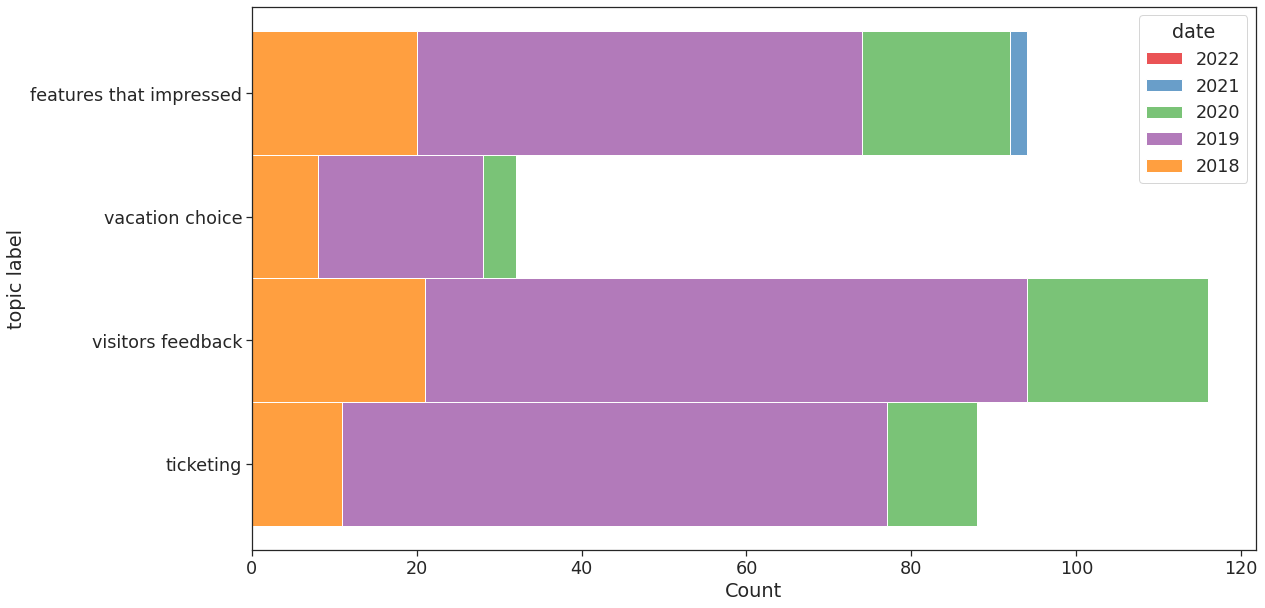

In [13]:
plt.figure(figsize=(18,10))

hue_order = [2022, 2021, 2020, 2019, 2018]
sns.histplot(data=uss_topred, y="topic label", hue="date", hue_order=hue_order, multiple="stack", bins= 50, palette="Set1") 
